<a href="https://colab.research.google.com/github/Pragna235/ACM-Winter-School-Hands-on-Labs/blob/main/Lab_3_medMnist_Dataset_Analysis_using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visualize Neural Network
https://playground.tensorflow.org/

* 0.001 linear 1,2
* 0.001 sigmoid 1,2
* 0.01 sigmoid 1,2
* 0.001 relu 1,2
* 0.001 tanh 1,4 1500 epoch
* 0.03 tanh 4 1500 epoch


### Install Required Packages

In [1]:
!pip install medmnist
!pip install Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=7c16e5778792cab51b15f8c1063806bd8d8459fbfd397bd0daec48653bc601f7
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


### Import Package

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from tqdm import tqdm
import numpy as np

import medmnist
from medmnist import INFO, Evaluator

In [4]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v2.2.3 @ https://github.com/MedMNIST/MedMNIST/


In [5]:
# import dataset_without_pytorch

# from dataset_without_pytorch import get_loader


### Parameters

In [6]:
epoch = 2
learning_rate = 0.001
batch_size = 32
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss_used = tf.keras.losses.CategoricalCrossentropy()

### Load Dataset

In [7]:
from medmnist import BloodMNIST, DermaMNIST

First, we read the data, preprocess them and encapsulate them into dataloader form.

###Training Set

In [8]:
# load the data
train_dataset = BloodMNIST(split='train', download=True)
train_dataset

100%|██████████| 35461855/35461855 [00:02<00:00, 15569971.04it/s]


Dataset BloodMNIST (bloodmnist)
    Number of datapoints: 11959
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    License: CC BY 4.0

In [9]:
print("Number of samples in the training dataset = ",len(train_dataset))
print(train_dataset[0]) # Every sample in the dataset is a tuple containing 2 values - image & label
print(train_dataset[0][0]) #image
print("Size of the image = ",train_dataset[0][0].size)
print("Example Label = ",train_dataset[0][1]) #label

Number of samples in the training dataset =  11959
(<PIL.Image.Image image mode=RGB size=28x28 at 0x79BE544F6FE0>, array([7]))
<PIL.Image.Image image mode=RGB size=28x28 at 0x79BE544F7490>
Size of the image =  (28, 28)
Example Label =  [7]


In [21]:
def montage(self, length=20, replace=False, save_folder=None):
        from medmnist.utils import montage2d

        n_sel = length * length
        sel = np.random.choice(self.__len__(), size=n_sel, replace=replace)

        montage_img = montage2d(imgs=self.imgs,
                                n_channels=self.info['n_channels'],
                                sel=sel)

        if save_folder is not None:
            if not os.path.exists(save_folder):
                os.makedirs(save_folder)
            montage_img.save(os.path.join(save_folder,
                                          f"{self.flag}_{self.split}_montage.jpg"))

        return montage_img

In [22]:
train_dataset.montage(length=1)

/usr/local/lib/python3.10/dist-packages/medmnist/utils.py:31: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


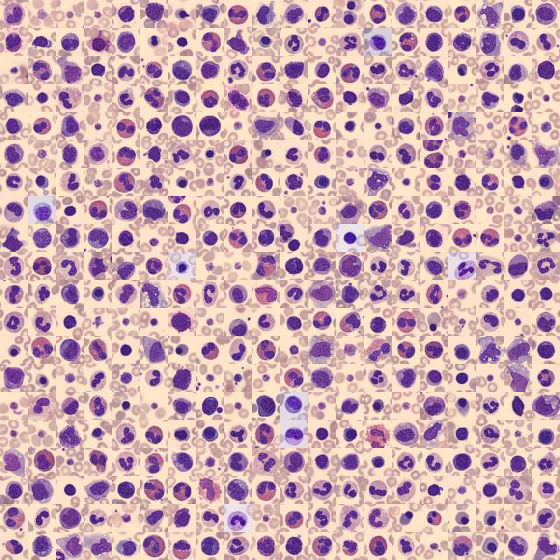

In [24]:
train_dataset.montage(length=20)

In [13]:
x, y = train_dataset[0] #x = image, y = label
print(np.array(x).shape, y.shape)

(28, 28, 3) (1,)


In [26]:
# In a way,we are finding the value_counts of the target variable

print("length of train_dataset = ",len(train_dataset))
class_count = [0,0,0,0,0,0,0,0] #we have a total of 8 classes (0-7)
for i in range(0,len(train_dataset)):
  x,y = train_dataset[i]
  # print(type(y))
  # print(y)
  # print(len(y))
  class_count[y[0]]+=1
print(class_count)

length of train_dataset =  11959
[852, 2181, 1085, 2026, 849, 993, 2330, 1643]


In [27]:
from PIL import Image

im = np.asarray(train_dataset[0][0])
print("Shape of the image = ",im.shape)
img = Image.fromarray(im)
img

Shape of the image =  (28, 28, 3)


In [31]:
no_of_class = 8

#This code snippet appears to be a Python function named read_data. It takes a parameter data, which is assumed to be a list of tuples. Each tuple contains two elements: the first element is an array x (presumably representing input data), and the second element is another array y (presumably representing labels or classes). The function processes this data and converts it into a format suitable for training a neural network.

def read_data(data):
  # Extracts the first tuple from the data list and assigns its elements to variables x and y.
  x,y = data[0]
  # Converts x (presumed to be an array) into a NumPy array.
  x = np.array(x) #(28,28,3)
  # Creates a new NumPy array data_x_new filled with zeros. This array will store the input data in a reshaped format.
  data_x_new = np.zeros((len(data),x.shape[0],x.shape[1],x.shape[2]),dtype=float)
  # Creates a new NumPy array data_y_new filled with zeros. This array will store the one-hot encoded labels.
  data_y_new = np.zeros((len(data),no_of_class),dtype=float)

  #  It iterates over each tuple in the data list.
  for i in range(0,len(data)):
    # Extracts the current tuple's elements into x and y.
    x,y = data[i]
    # Converts x into a NumPy array x_new.
    x_new = np.asarray(x)
    # Creates a new NumPy array y_new filled with zeros. This will be used to represent the one-hot encoded label.
    y_new = np.zeros(no_of_class,dtype=float)
    # Sets the element at the index specified by y[0] to 1 in the y_new array. This creates a one-hot encoded representation of the class label.
    y_new[y[0]] = 1
    # Assigns the reshaped input data to the i-th row of data_x_new.
    data_x_new[i]=x_new
    # Assigns the one-hot encoded label to the i-th row of data_y_new.
    data_y_new[i]=y_new

  # returns data_x_new and data_y_new, representing the preprocessed input data and corresponding labels, respectively.
  return data_x_new,data_y_new

In [32]:
train_x, train_y = read_data(train_dataset)
print(train_x.shape,train_y.shape)

(11959, 28, 28, 3) (11959, 8)


In [34]:
print(train_x[0])
print()
print(train_y[0])

[[[250. 223. 206.]
  [255. 229. 212.]
  [251. 222. 206.]
  ...
  [255. 238. 195.]
  [251. 230. 185.]
  [255. 234. 191.]]

 [[255. 229. 210.]
  [255. 229. 210.]
  [244. 215. 199.]
  ...
  [254. 232. 193.]
  [254. 233. 190.]
  [255. 242. 201.]]

 [[255. 231. 208.]
  [255. 227. 205.]
  [238. 210. 189.]
  ...
  [255. 233. 202.]
  [251. 229. 192.]
  [255. 242. 203.]]

 ...

 [[233. 204. 172.]
  [239. 210. 180.]
  [245. 218. 188.]
  ...
  [255. 225. 199.]
  [255. 226. 200.]
  [255. 228. 199.]]

 [[215. 184. 156.]
  [218. 188. 160.]
  [228. 198. 170.]
  ...
  [255. 225. 201.]
  [254. 227. 200.]
  [255. 228. 201.]]

 [[217. 182. 162.]
  [212. 180. 159.]
  [213. 181. 158.]
  ...
  [254. 226. 204.]
  [255. 227. 203.]
  [255. 228. 201.]]]

[0. 0. 0. 0. 0. 0. 0. 1.]


### Validation set

In [35]:
# load the data
val_dataset = BloodMNIST(split='val', download=True)

print(val_dataset)

Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Dataset BloodMNIST (bloodmnist)
    Number of datapoints: 1712
    Root location: /root/.medmnist
    Split: val
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×

In [36]:
x, y = val_dataset[0]

print(np.array(x).shape, y.shape)

(28, 28, 3) (1,)


In [37]:
print(len(val_dataset))
class_count = [0,0,0,0,0,0,0,0,0]
for i in range(0,len(val_dataset)):
  x,y = val_dataset[i]
  # print(type(y))
  # print(y)
  # print(len(y))
  class_count[y[0]]+=1
print(class_count)

1712
[122, 312, 155, 290, 122, 143, 333, 235, 0]


In [38]:
from PIL import Image

im = np.asarray(train_dataset[0][0])
print(im.shape)
img = Image.fromarray(im)
img

(28, 28, 3)


In [39]:
val_x, val_y = read_data(val_dataset)
print(val_x.shape,val_y.shape)

(1712, 28, 28, 3) (1712, 8)


### Test Set

In [40]:
# load the data
test_dataset = BloodMNIST(split='test', download=True)

print(test_dataset)

Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Dataset BloodMNIST (bloodmnist)
    Number of datapoints: 3421
    Root location: /root/.medmnist
    Split: test
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200

In [41]:
x, y = test_dataset[0]

print(np.array(x).shape, y.shape)
print(y)

(28, 28, 3) (1,)
[3]


In [42]:
print(len(test_dataset))
class_count = [0,0,0,0,0,0,0,0,0]
for i in range(0,len(test_dataset)):
  x,y = test_dataset[i]
  # print(type(y))
  # print(y)
  # print(len(y))
  class_count[y[0]]+=1
print(class_count)

3421
[244, 624, 311, 579, 243, 284, 666, 470, 0]


In [43]:
test_x, test_y = read_data(test_dataset)
print(test_x.shape,test_y.shape)

(3421, 28, 28, 3) (3421, 8)


### Neural Networks

In [46]:
from tensorflow.keras import models, layers

Here, we are creating a Feed Forward Neural Network

In [47]:
# This line defines the input layer for the neural network. The shape=(28, 28, 3,) argument indicates that the input data is expected to have a shape of 28x28 pixels with 3 color channels (RGB).
input_layers = layers.Input(shape=(28,28,3,))

# This line flattens the input data. It transforms the 3D input into a 1D array, which is often necessary when transitioning from convolutional layers to fully connected layers in a neural network.
y = layers.Flatten()(input_layers)
#  This line adds a fully connected (dense) layer with 1024 units and a rectified linear unit (ReLU) activation function. The output of the previous layer (y) serves as the input to this layer.
y = layers.Dense(1024,activation=tf.nn.relu)(y)
y = layers.Dense(512,activation=tf.nn.relu)(y)
y = layers.Dense(256,activation=tf.nn.relu)(y)
y = layers.Dense(128,activation=tf.nn.relu)(y)
y = layers.Dense(64,activation=tf.nn.relu)(y)
y = layers.Dense(32,activation=tf.nn.relu)(y)
y = layers.Dense(16,activation=tf.nn.relu)(y)

# This line adds the final output layer with 8 units (assuming 8 classes) and a softmax activation function. The softmax function is often used in multi-class classification problems to convert the raw model output into probability scores for each class.
output_layers = layers.Dense(8,activation='softmax')(y)
# This line creates a Keras Model by specifying the input and output layers. The nn_model is the resulting neural network model that can be compiled, trained, and used for making predictions.
nn_model = tf.keras.Model(inputs = input_layers, outputs = output_layers)

In [48]:
nn_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 2352)              0         
                                                                 
 dense_8 (Dense)             (None, 1024)              2409472   
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256

This line of code compiles the neural network model using the Keras API in TensorFlow. Let's break down the components of this line:

In [49]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'],)
# The optimizer is responsible for updating the weights of the neural network during training in order to minimize the defined loss function.

In [50]:
nn_history = nn_model.fit(train_x,train_y,epochs=epoch,batch_size=batch_size,verbose=True,validation_data=(val_x,val_y))
#epoch : This parameter specifies the number of times the entire training dataset is processed by the neural network during training. Each pass through the entire dataset is called an epoch.

Epoch 1/2
374/374 [==============================] - 26s 65ms/step - loss: 2.4633 - accuracy: 0.1730 - val_loss: 2.0321 - val_accuracy: 0.1822
Epoch 2/2
374/374 [==============================] - 20s 53ms/step - loss: 2.0200 - accuracy: 0.1846 - val_loss: 2.0119 - val_accuracy: 0.1945


In [51]:
score = nn_model.evaluate(test_x, test_y, verbose = 0)
print(score)

[2.0117318630218506, 0.19467991590499878]


###VGG

Visualize Convolution: https://poloclub.github.io/cnn-explainer/

about filters: https://sbme-tutorials.github.io/2018/cv/notes/4_week4.html

In [ ]:
from tensorflow.keras import models, layers

In [53]:
# This line initializes a sequential model using Keras. A sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
vgg_model = tf.keras.Sequential()

vgg_model.add(layers.Input((28,28,3)))
# This adds a zero-padding layer to the model. Zero-padding is added to both the height and width dimensions, effectively increasing the spatial dimensions of the input tensor. In this case, it pads the input with 2 pixels on all sides.
vgg_model.add(layers.ZeroPadding2D((2,2)))

vgg_model.add(layers.Conv2D(64,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(64,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.MaxPool2D((2,2),strides=2))

vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.MaxPool2D((2,2),strides=2))

vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.MaxPool2D((2,2),strides=2))

vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dense(4096,activation='relu'))
vgg_model.add(layers.Dense(256,activation='relu'))
vgg_model.add(layers.Dense(8,activation='softmax'))

In [54]:
vgg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'],)

In [ ]:
vgg_history = vgg_model.fit(train_x,train_y,epochs=epoch,batch_size=batch_size,verbose=True,validation_data=(val_x,val_y))

In [ ]:
score = vgg_model.evaluate(test_x, test_y, verbose = 0)
print(score)

[0.4703370928764343, 0.8363052010536194]


In [ ]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 32, 32, 3)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       1

### ResNet

Visualize CNN models: https://adamharley.com/nn_vis/cnn/3d.html

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.applications import resnet50

In [ ]:
input_layer=layers.Input(shape=(28,28,3))
resnet_model=resnet50.ResNet50(weights='imagenet',input_tensor=input_layer,include_top=True)
resnet_model.summary()
last_layer = resnet_model.get_layer('avg_pool').output

102967424/102967424 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 34, 34, 3)            0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 14, 14, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 14, 14, 64)           256       ['conv1_conv[0][0]']          
 on)                    

In [ ]:
flatten=layers.Flatten()(last_layer)
output_layer=layers.Dense(no_of_class,activation='softmax')(flatten)
rs50_model = tf.keras.Model(inputs = input_layer, outputs = output_layer)

In [ ]:
rs50_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 34, 34, 3)            0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 14, 14, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 14, 14, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
rs50_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'],)

In [ ]:
rs50_history = rs50_model.fit(train_x,train_y,epochs=epoch-1,batch_size=batch_size,verbose=True,validation_data=(val_x,val_y))


374/374 [==============================] - 825s 2s/step - loss: 0.7946 - accuracy: 0.7516 - val_loss: 5.9759 - val_accuracy: 0.5654


In [ ]:
score = rs50_model.evaluate(test_x, test_y, verbose = 0)
print(score)

[5.224215030670166, 0.5729318857192993]
